In [2]:
import os
import copy
from itertools import count
import json
import pickle
import numpy as np
import csv

import matplotlib.pyplot as plt

In [3]:
# open json file
path = './test-json-data/'
open_file = 'CaveCrawler-v0.json'
env_file = os.path.join(path, open_file)

with open(env_file) as f:
    env_json = json.load(f)

env_json

{'grid_width': 70,
 'grid_height': 14,
 'objects': {'terrain': {'indices': [930,
    860,
    790,
    720,
    650,
    699,
    580,
    629,
    510,
    511,
    524,
    525,
    526,
    527,
    528,
    529,
    530,
    531,
    532,
    533,
    534,
    535,
    536,
    537,
    538,
    539,
    540,
    541,
    542,
    543,
    544,
    545,
    546,
    547,
    548,
    549,
    550,
    551,
    552,
    553,
    554,
    555,
    556,
    557,
    558,
    559,
    441,
    442,
    443,
    444,
    445,
    446,
    447,
    448,
    449,
    450,
    451,
    452,
    453,
    454,
    459,
    460,
    461,
    462,
    463,
    464,
    465,
    466,
    467,
    468,
    469,
    470,
    471,
    472,
    473,
    478,
    479,
    480,
    489,
    373,
    374,
    375,
    376,
    377,
    378,
    379,
    380,
    381,
    382,
    392,
    393,
    394,
    395,
    396,
    397,
    398,
    399,
    400,
    401,
    409,
    410,
    419,
    305,
 

In [4]:
width, height = env_json['grid_width'], env_json['grid_height']+5
width, height

text = np.full((height,width),'-')
print(text)

[['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']
 ...
 ['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']]


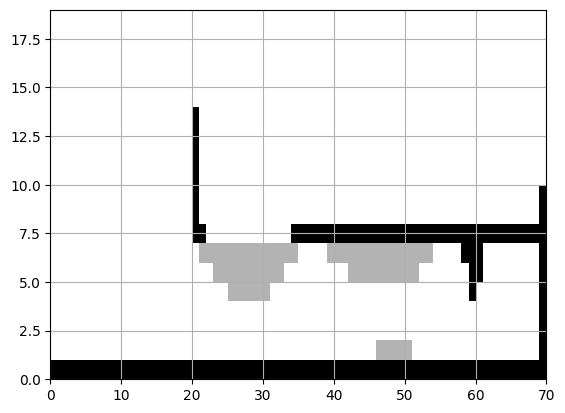

In [5]:
fig, ax = plt.subplots()

for platform in env_json['objects'].values():
    for idx, t in zip(platform['indices'],platform['types']):
        x = idx % width
        y = idx // width

        if t==2: 
            color = [0.7,0.7,0.7]
            text[y,x] = 'S'
        else:
            color = 'k'
            text[y,x] = 'H'
        ax.fill_between([x,x+1], [y+1, y+1], [y, y], fc=color)

text1 = np.flipud(text)
ax.set_xlim([0,width])
ax.set_ylim([0,height])
ax.grid()
plt.show()

In [6]:
Text = []
for i in text1:
    t = "".join(i)
    Text.append(t)
Text 

['----------------------------------------------------------------------',
 '----------------------------------------------------------------------',
 '----------------------------------------------------------------------',
 '----------------------------------------------------------------------',
 '----------------------------------------------------------------------',
 '--------------------H-------------------------------------------------',
 '--------------------H-------------------------------------------------',
 '--------------------H-------------------------------------------------',
 '--------------------H-------------------------------------------------',
 '--------------------H------------------------------------------------H',
 '--------------------H------------------------------------------------H',
 '--------------------HH------------HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 '---------------------SSSSSSSSSSSSSS----SSSSSSSSSSSSSSS----HHH--------H',
 '-----------------------

In [10]:
basename = os.path.splitext(os.path.basename(open_file))[0]
with open('./csv-list-data/{}.csv'.format(basename), 'w') as f:
    writer = csv.writer(f)
    for i in Text:
        writer.writerow(i)